# Predict A Doctor's Consultation Fee

Reason to predict the doctor Consultation Fee

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that.

Feature Detail:
    
Size of training set: 5961
    
Size of test set: 1987
    
Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years
    
Rating: Rating given by patients
    
Profile: Type of the doctor
    
Miscellaneous_Info: Extra information about the doctor
    
Fees: Fees charged by the doctor (Target Variable)
    
Place: Area and the city where the doctor is located.

In [149]:
#importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [150]:
train = pd.read_excel('Doctor Consultation Fees_Final_Train.xlsx')
train = pd.DataFrame(data = train)

In [151]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [152]:
train.shape

(5961, 7)

In [153]:
train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


# Checking null value

In [155]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

As we can observe that Rating and Miscellaneous_Info has missing value 3302 & 2620.

<AxesSubplot:>

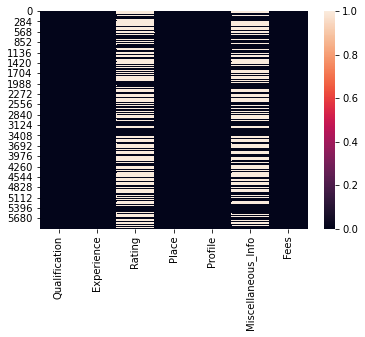

In [156]:
sns.heatmap(train.isnull())

In [157]:
#We can drop Miscellaneous_Info column as information provide in it is already provide in other columns
train.drop(['Miscellaneous_Info'], axis = 1, inplace = True)
train

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


In [158]:
#Filling Null value
train['Rating'].fillna('0%', inplace=True)
train['Place'].fillna('Unknown', inplace=True)

In [159]:
train.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

In [160]:
train.head(20)

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0%,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,0%,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
5,BAMS,8 years experience,0%,"Porur, Chennai",Ayurveda,100
6,BHMS,42 years experience,0%,"Karol Bagh, Delhi",Homeopath,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,200
8,"MBBS, MD - General Medicine",14 years experience,0%,"Old City, Hyderabad",General Medicine,100
9,"BSc, BDS",23 years experience,0%,"Athani, Ernakulam",Dentist,100


In [161]:
for i in range(len(train)):
    train['Rating'][i]=train['Rating'][i][:-1]
    
train['Rating']=train['Rating'].astype(float)

In [162]:
train['Rating']=train['Rating']*0.1

In [163]:
for i in range(len(train)):
    train['Experience'][i]=train['Experience'][i][:-17]
    
train['Experience']=train['Experience'].astype(float)

In [164]:
train.head(10)

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24.0,10.0,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12.0,9.8,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9.0,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12.0,0.0,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20.0,10.0,"Keelkattalai, Chennai",Ayurveda,250
5,BAMS,8.0,0.0,"Porur, Chennai",Ayurveda,100
6,BHMS,42.0,0.0,"Karol Bagh, Delhi",Homeopath,200
7,BDS,10.0,9.9,"Arekere, Bangalore",Dentist,200
8,"MBBS, MD - General Medicine",14.0,0.0,"Old City, Hyderabad",General Medicine,100
9,"BSc, BDS",23.0,0.0,"Athani, Ernakulam",Dentist,100


In [171]:
for i in range(len(train)): #Removing the area and leaving only city name
    train['Place'][i]=train['Place'][i].split(",")[-1]
    
train.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24.0,10.0,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12.0,9.8,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9.0,0.0,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",12.0,0.0,Bangalore,Ayurveda,250
4,BAMS,20.0,10.0,Chennai,Ayurveda,250


In [179]:
train['Place'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
e                         1
Name: Place, dtype: int64

In [176]:
train['Qualification'].value_counts()[:30]

BDS                                                      488
BHMS                                                     477
BAMS                                                     471
MBBS                                                     334
MBBS, MS - ENT                                           220
MBBS, MD - Dermatology                                   178
MBBS, MD - General Medicine                              177
MBBS, MD - Dermatology , Venereology & Leprosy           140
BHMS, MD - Homeopathy                                     93
MBBS, DDVL                                                92
MBBS, Diploma in Otorhinolaryngology (DLO)                84
BAMS, MD - Ayurveda Medicine                              82
BDS, MDS - Conservative Dentistry & Endodontics           68
MBBS, DDV                                                 66
BDS, MDS                                                  63
BDS, MDS - Oral & Maxillofacial Surgery                   57
MD - Dermatology , Vener

# EDA and Data Visualisation

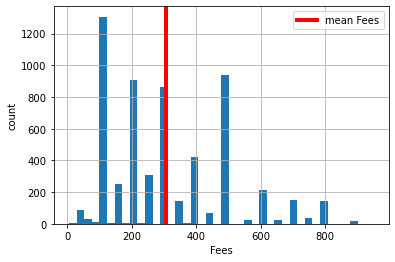

In [196]:
# lets check the mean fees
Fees = train['Fees'].hist(bins=40)
mean_val= np.mean(train['Fees'])
plt.axvline(mean_val,linewidth=4, color='red', label='mean Fees')
plt.xlabel('Fees')
plt.ylabel('count')
plt.legend()
plt.show()

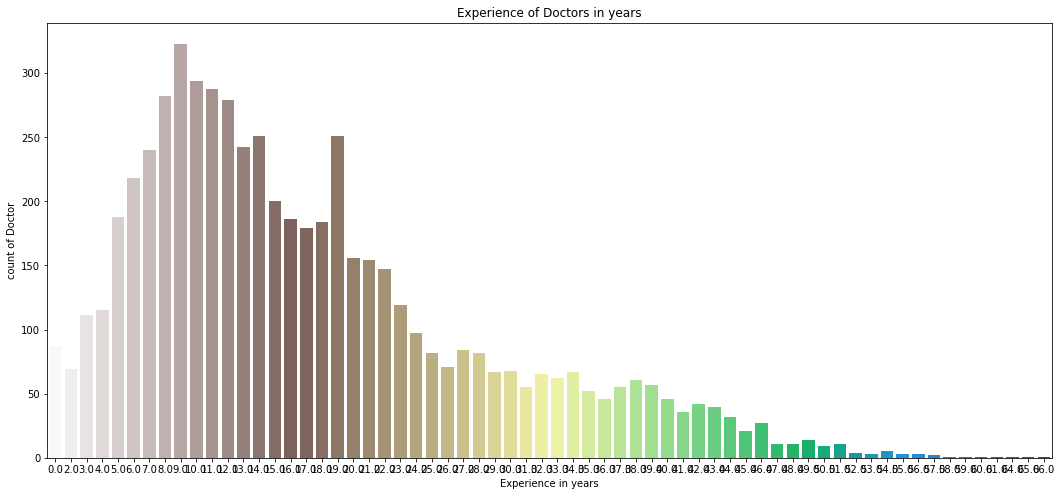

9.0     323
10.0    294
11.0    288
8.0     282
12.0    279
       ... 
65.0      1
59.0      1
61.0      1
58.0      1
66.0      1
Name: Experience, Length: 64, dtype: int64

In [201]:
plt.subplots(figsize=(18,8))
sns.countplot(x='Experience',data=train,palette='terrain_r')
plt.title('Experience of Doctors in years')
plt.xlabel('Experience in years')
plt.ylabel('count of Doctor')
plt.show()
train['Experience'].value_counts()


Observation :
Maximum Doctors hace 5 to 22 years of experience

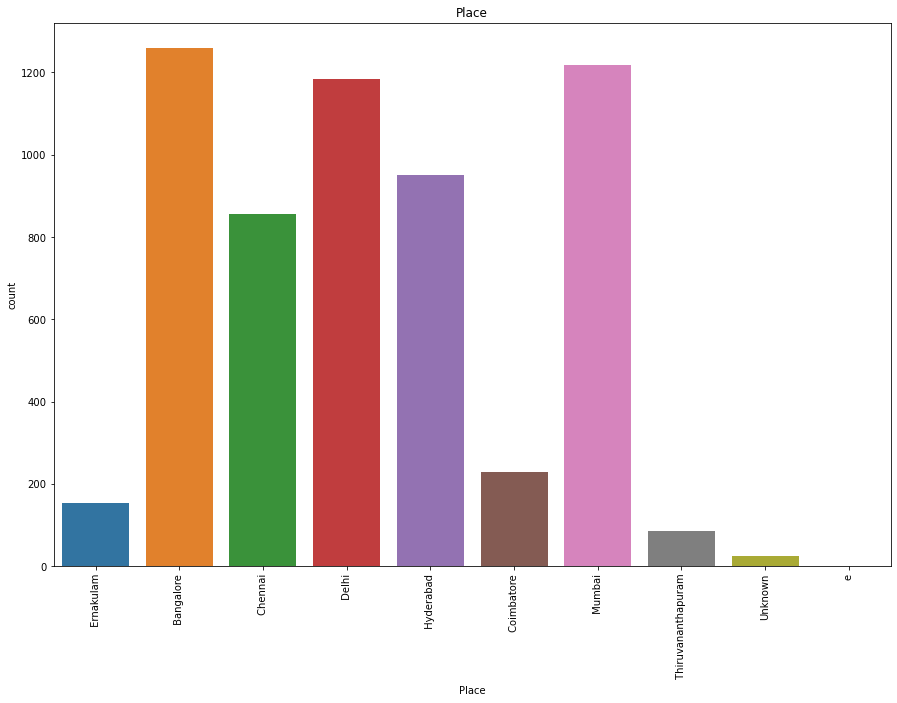

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
e                         1
Name: Place, dtype: int64


In [188]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='Place',data=train)
plt.title('Place')
plt.show()
print(train['Place'].value_counts())

Bangalore is the one which have most number of doctors

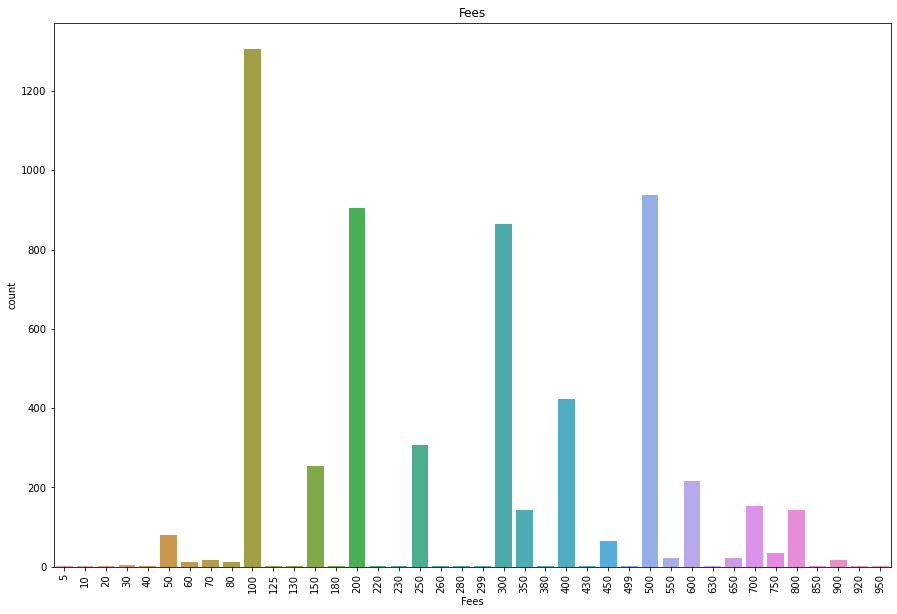

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


In [189]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(x='Fees',data=train)
plt.title('Fees')
plt.show()
print(train['Fees'].value_counts())


Maximum Doctor's have 100 Rupees as consultaion fee

# Bivariate Analysis

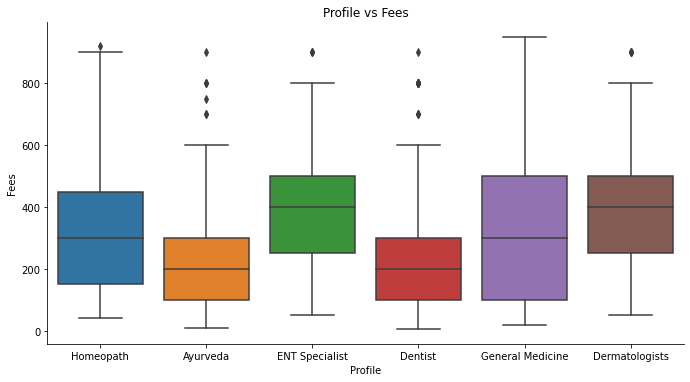

In [193]:
sns.catplot(x='Profile', y = 'Fees', data= train, kind='box', height=5, aspect=1.9)
plt.title("Profile vs Fees")
plt.show()

Observation:
ENT Specialists and Dermatologists Consulation Fees are higher.
Ayurveda and Dentists Consultation Fees are lower.

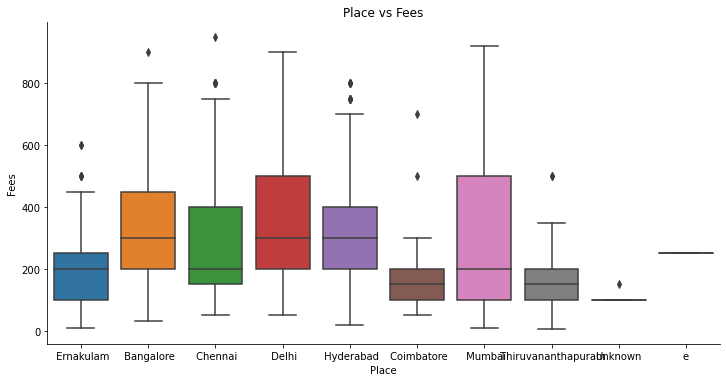

In [195]:
sns.catplot(x='Place',y='Fees',data=train,kind="box",height=5,aspect=2.0)
plt.title('Place vs Fees')
plt.show()


Observation:
The Fees are higher in Bangalore, Chennai and Hyderabad.

obsrvation: 1. maximum experience of Doctor we can observe is 66 years having cout of 1 Doctor in number. 2. 323 numbers of the doctor having experience of 9 years hich is the most count of doctor in numbers. 3. 294 numbers of doctor is having 10 years of experience.

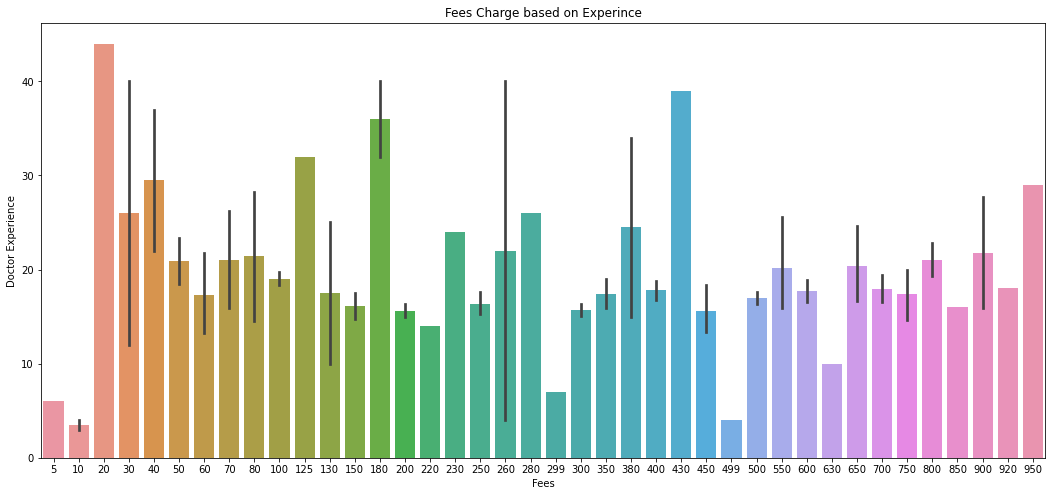

In [205]:
#fees vs Experience
plt.subplots(figsize=(18,8))
sns.barplot(x='Fees',y='Experience',data=train)
plt.title('Fees Charge based on Experince')
plt.xlabel('Fees')
plt.ylabel('Doctor Experience')
plt.show()

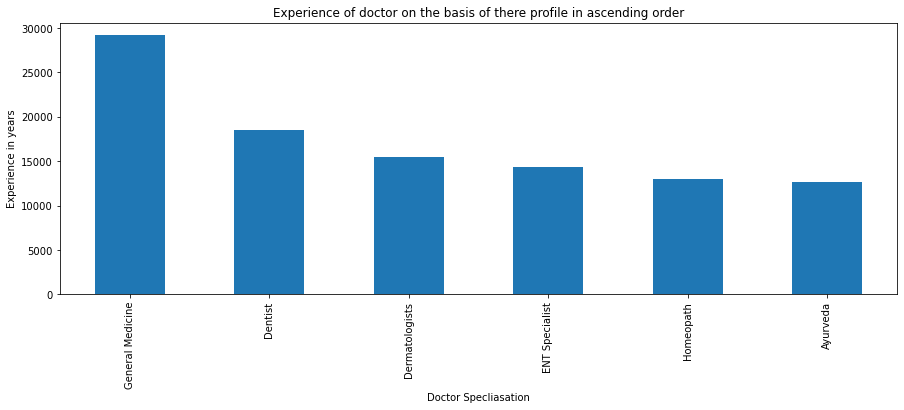

In [207]:
#Profile vs experience
plt.subplots(figsize=(18,8))
train.groupby('Profile')['Experience'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Experience of doctor on the basis of there profile in ascending order')
plt.xlabel('Doctor Specliasation')
plt.ylabel('Experience in years')
plt.show()

# Multivariate Analysis

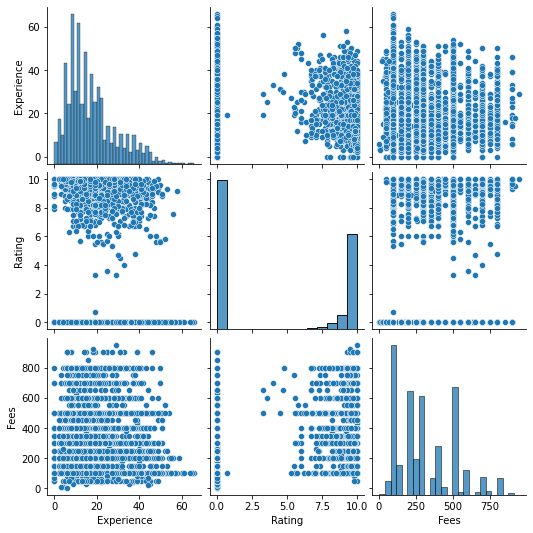

In [208]:
sns.pairplot(train)

In [209]:
#lets drop Qualification and Place and convert the profile to int datatypes.
train.drop(['Qualification','Place'],inplace=True,axis=1)

In [210]:
#lets convert the the profile categorical data to int type using label encoder.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Profile']=le.fit_transform(train['Profile'])
train

,Experience,Rating,Profile,Fees
0,24.0,10.0,5,100
1,12.0,9.8,0,350
2,9.0,0.0,3,300
3,12.0,0.0,0,250
4,20.0,10.0,0,250
...,...,...,...,...
5956,19.0,9.8,3,300
5957,33.0,0.0,4,100
5958,41.0,9.7,4,600
5959,15.0,9.0,4,100


# Test Data

In [218]:
test=pd.read_excel("Doctor Consultation Fees_Final_Test.xlsx")

In [219]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [220]:
#lets check the shape
test.shape

(1987, 6)

In [221]:
#lets check the data types
test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [222]:
#lets check the null value present in our data set
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

observation: ** we can observe that out of total 1987 data there is 1090 data which is null in Rating columns. ** place columns having null value present 6 ** miscellaneous_info is having 834 null values, lets drop this columns cause this columns doesnt has impact on my target. variable.

In [223]:
test.drop(columns='Miscellaneous_Info',inplace=True)
test
# below we can observe Miscellaneous_Info is dropped.

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist


In [224]:
#lets fill the null value with the most frequent value
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
col=['Rating','Place']
for i in col:
    test[i]=imp.fit_transform(test[i].values.reshape(-1,1))
#lets check the null value again
test.isnull().sum()
# we can observe there is no null value present in the dataset

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
dtype: int64

# EDA and Data Visualisation

In [226]:
# Before moving further lets explore column and try to delete the alphabetical value.
# lets delete the alpha value from experience column and make the dtype int.
test['Experience'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
test['Experience'] =test['Experience'].astype('int')
#lets delete the alpha value from experience column and make the dtype int.
test['Rating'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
test['Rating'] = test['Rating'].astype('int')

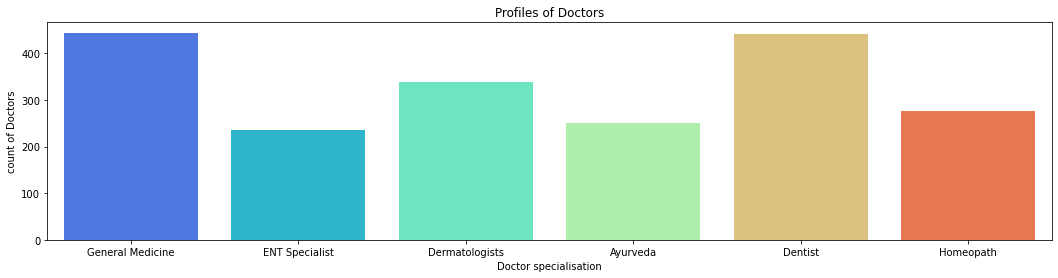

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In [228]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Profile',data=test,palette='rainbow')
plt.title('Profiles of Doctors')
plt.xlabel('Doctor specialisation')
plt.ylabel('count of Doctors')
plt.show()
test['Profile'].value_counts()

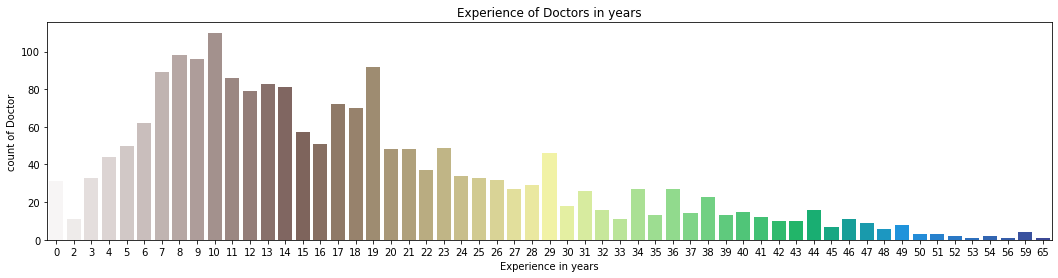

10    110
8      98
9      96
19     92
7      89
11     86
13     83
14     81
12     79
17     72
18     70
6      62
15     57
16     51
5      50
23     49
21     48
20     48
29     46
4      44
22     37
24     34
3      33
25     33
26     32
0      31
28     29
27     27
34     27
36     27
31     26
38     23
30     18
32     16
44     16
40     15
37     14
39     13
35     13
41     12
33     11
2      11
46     11
42     10
43     10
47      9
49      8
45      7
48      6
59      4
50      3
51      3
52      2
54      2
53      1
56      1
65      1
Name: Experience, dtype: int64

In [227]:
plt.subplots(figsize=(18,4))
sns.countplot(x='Experience',data=test,palette='terrain_r')
plt.title('Experience of Doctors in years')
plt.xlabel('Experience in years')
plt.ylabel('count of Doctor')
plt.show()
test['Experience'].value_counts()

# Bivariate analysis


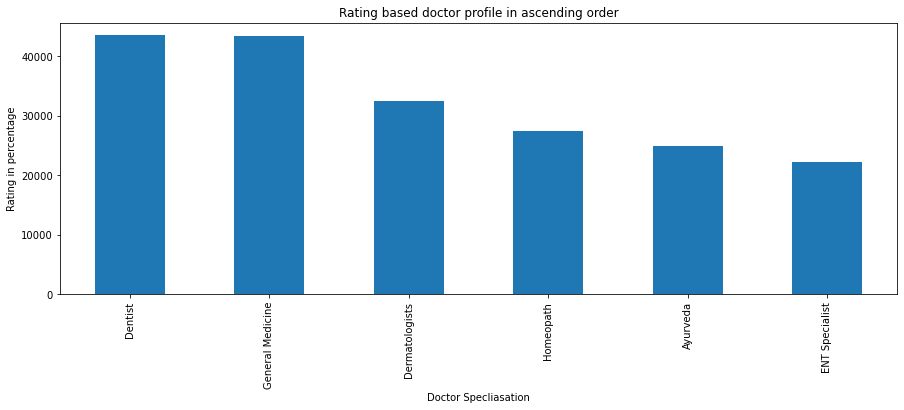

In [229]:
#Rating vs Profile
plt.subplots(figsize=(18,4))
test.groupby('Profile')['Rating'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Rating based doctor profile in ascending order')
plt.xlabel('Doctor Specliasation')
plt.ylabel('Rating in percentage')
plt.show()

observation: 1. we can observe the profile based on rating the best rating we can observe for Dentist followed by General medicine, and the least rating we can observe for ENT specialist.

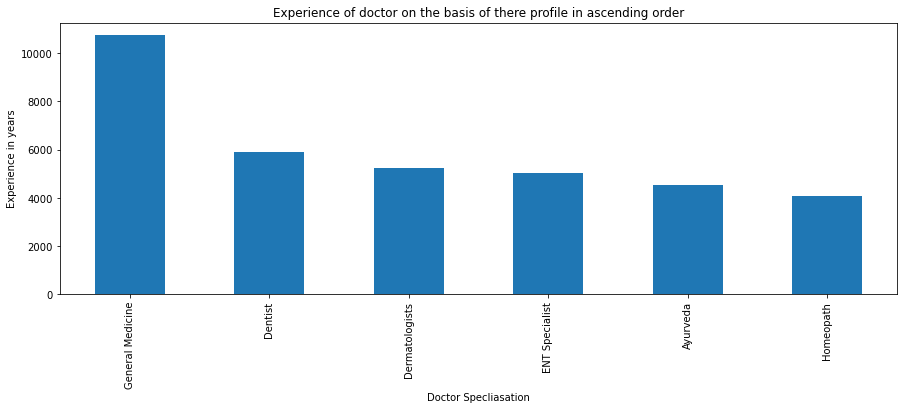

In [230]:
#Experience vs Profile
plt.subplots(figsize=(18,4))
test.groupby('Profile')['Experience'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Experience of doctor on the basis of there profile in ascending order')
plt.xlabel('Doctor Specliasation')
plt.ylabel('Experience in years')
plt.show()

General medicine has maximum no. of doctor experience

# Skewness and Outlier

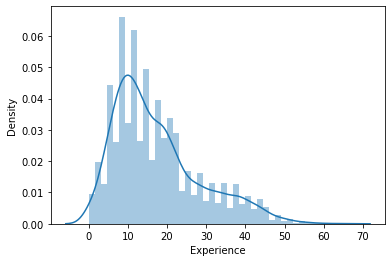

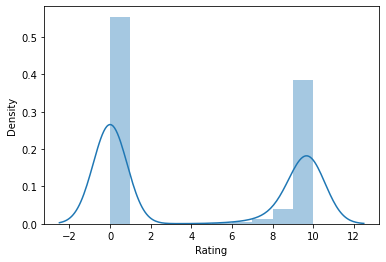

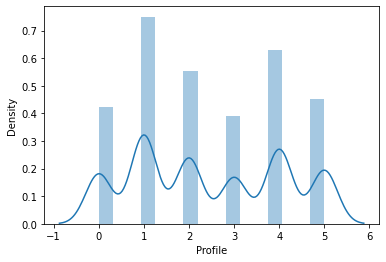

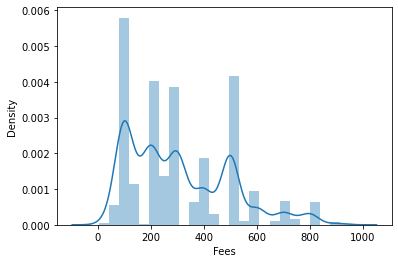

In [231]:
for i in train.columns:
    sns.distplot(train[i])
    plt.show()

In [232]:
train.skew()

Experience    0.991089
Rating        0.247186
Profile       0.108803
Fees          0.751870
dtype: float64

In [233]:
for col in train.columns:
    if train.skew().loc[col]>0.55:
        train[col]=np.sqrt(train[col])

In [234]:
train.skew()

Experience    0.082582
Rating        0.247186
Profile       0.108803
Fees          0.245176
dtype: float64

# Removing Outliers

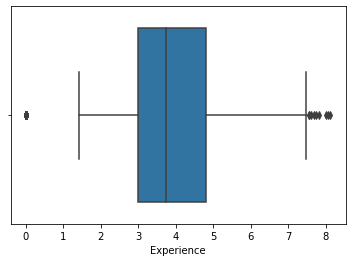

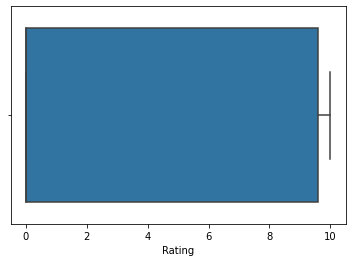

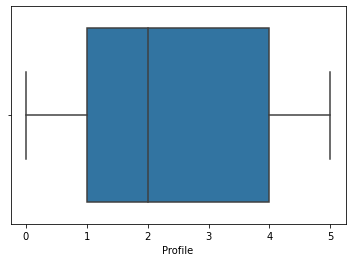

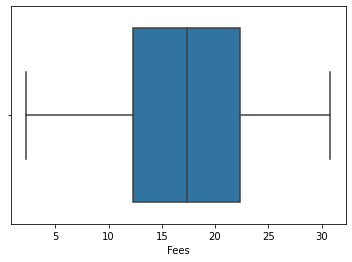

In [235]:
# let plot the box plot to identify the outliers
for i in train.columns:
    sns.boxplot(train[i])
    plt.show()

In [236]:
#lets remove the outliers using zscore
from scipy.stats import zscore
z=abs(zscore(train))
print(train.shape)
new=train.loc[(z<3).all(axis=1)]
print(new.shape)
# we can observe the new zscore down below.

(5961, 4)
(5959, 4)


# Model Training

In [238]:
# lets sepearate input output columns
df_x= new.drop(columns=['Fees']) # input variable
y=pd.DataFrame(new['Fees']) #target variable


In [239]:
# lets scale the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()
# WE CAN NOTICE OUR DATA IS BEEN SCALED.

,Experience,Rating,Profile
0,0.714685,1.220328,1.543100
1,-0.344885,1.178079,-1.472554
2,-0.687596,-0.892114,0.336838
3,-0.344885,-0.892114,-1.472554
4,0.399487,1.220328,-1.472554


In [240]:
x.skew()

Experience    0.076317
Rating        0.246583
Profile       0.109310
dtype: float64

no skewness present in dataset

In [242]:
#lets import model library
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [245]:
#importing ensemble technique
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor


#Importing error matrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [250]:
#lets apply regreerror,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y): #Def is used such that we can call it later
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print('max r2 score correponding to',final_r_state,'is',max_r_score)
    print()
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
    print('Mean Squared error:',mean_squared_error(y_test,y_pred))
    print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    return final_r_state

In [251]:
model=[LinearRegression(),KNeighborsRegressor(),SVR(),GradientBoostingRegressor(),RandomForestRegressor(),Ridge(),ElasticNet(),AdaBoostRegressor()]
for m in model:
    print(m)
    r_state=maxr2_score(m,x,y)

LinearRegression()

max r2 score correponding to 44 is 0.06867727410977353

Error:
Mean absolute error: 4.447854946979405
Mean Squared error: 28.124366254545407
Root Mean Squared error: 5.303241108468048


KNeighborsRegressor()

max r2 score correponding to 83 is 0.06845812176097532

Error:
Mean absolute error: 4.480917252192427
Mean Squared error: 30.75873710012769
Root Mean Squared error: 5.546055995040772


SVR()

max r2 score correponding to 83 is 0.16709091110212793

Error:
Mean absolute error: 4.132935215525065
Mean Squared error: 26.098419475407923
Root Mean Squared error: 5.108661221436387


GradientBoostingRegressor()

max r2 score correponding to 83 is 0.18945374289759287

Error:
Mean absolute error: 4.094005144920323
Mean Squared error: 25.1493536326007
Root Mean Squared error: 5.014913123135903


RandomForestRegressor()

max r2 score correponding to 44 is 0.07597036056333062

Error:
Mean absolute error: 4.4192447178242125
Mean Squared error: 30.244948585313466
Root Mean Squ

In [252]:
#lets cross validate all the model uing FOR loop.
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),KNeighborsRegressor(),SVR(),GradientBoostingRegressor(),Ridge(),ElasticNet(),AdaBoostRegressor()]
for m in model:
    cvs=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Cross val score of',m,'is:')
    print('Cross val score is',cvs)
    print('Mean cross val score of',m,'is',cvs.mean())
    print('Standard deviation of',m,'is',cvs.std())
    print('\n')

Cross val score of LinearRegression() is:
Cross val score is [0.04016338 0.05964639 0.07025932 0.05677315 0.04245194 0.05990473
 0.03867011 0.04646292 0.05108302 0.05636198]
Mean cross val score of LinearRegression() is 0.05217769385285429
Standard deviation of LinearRegression() is 0.009676289983372294


Cross val score of KNeighborsRegressor() is:
Cross val score is [-0.04161305 -0.01577224 -0.01817456 -0.04152966 -0.00133806  0.03774104
 -0.07181521 -0.03037513 -0.02360276  0.00691441]
Mean cross val score of KNeighborsRegressor() is -0.019956522597986682
Standard deviation of KNeighborsRegressor() is 0.028572641899770414


Cross val score of SVR() is:
Cross val score is [0.12422762 0.12375342 0.147045   0.11362994 0.1404841  0.15781883
 0.11335251 0.0898865  0.0984879  0.15314742]
Mean cross val score of SVR() is 0.12618332360711132
Standard deviation of SVR() is 0.02187242977954557


Cross val score of GradientBoostingRegressor() is:
Cross val score is [0.15161077 0.17133964 0.159

In [253]:
# lets check the best parameter using grid search cv.
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,100]} 
# use n_estimator with step of 50
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [254]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=77,test_size=0.20)
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("R2 Score for Ridge : ",r2_score(y_test,pred)*100)
print('Cross Validation Score for Ridge: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()*100)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score for Ridge :  15.507931757608684
Cross Validation Score for Ridge:  15.534311761710235


Mean absolute error: 4.089675055353883
Mean Squared error: 24.712960396090807
Root Mean Squared Error : 4.971213171459338


In [255]:
#lets test the model
doc_cons_fee=gbr.predict(x)

AxesSubplot(0.125,0.125;0.775x0.755)


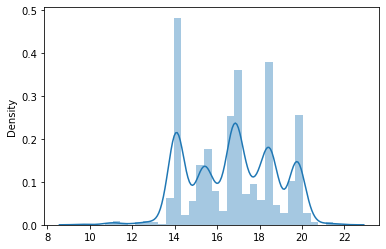

In [256]:
print(sns.distplot([doc_cons_fee]))

In [257]:
#lets save the predicted result to excel file.
ds=pd.DataFrame(doc_cons_fee)
ds.to_csv('doc_cons_fee.csv')

In [258]:
# lets Save the model
import joblib
joblib.dump(gbr,'doc_cons_fee.pkl')

['doc_cons_fee.pkl']

conclusion: 
1. After Exploring this Doctor consultation prediction fees we came to various conclusion 
2. As this dataset was distributed in two parts train and test dataset we explored both the dataset individually, i have plotted each and every parameter describing the fees pridiction, the isight is mentioned with the plotting above. 
3. I checked the skewness , treated them and tried to remove the outliers using zscore. 
4. I applied all the possible regression technique to fid the best module, after exploring almost all the algorithm and finded best parameter using grid search cv come to conclusion that gradient boostig is working well with r2 score of 15% though its quite less further improvement can be done with this dataset. 
5. This is not it we can further improve the data and explore it and we might get better score from what i get.